# Exploratory analysis

In [1]:
from skimage.feature.peak import peak_local_max

%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('../data/GEN-SIM_Ele-Eta0-Phi0-Energy50.txt',
                 delim_whitespace=True, header=None)
df.shape

(3000, 2160)

## Energy distributions

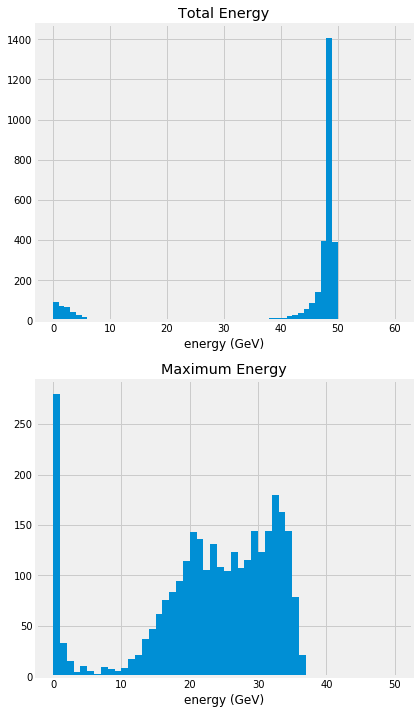

In [3]:
sumenergy = df.sum(axis=1)
maxenergy = df.max(axis=1)

fig, ax = plt.subplots(2, 1, figsize=(6, 12))

ax[0].hist(sumenergy, 60, (0, 60))
ax[0].set_title('Total Energy')
ax[0].set_xlabel('energy (GeV)')

ax[1].hist(maxenergy, 50, (0, 50))
ax[1].set_title('Maximum Energy')
ax[1].set_xlabel('energy (GeV)');

## Calorimeter images

In [4]:
N = 20           # number of images
DIM_ETA = 6      # number of crystals in ETA
DIM_PHI = 360    # number of crystals in PHI
CUT_PHI = 40     # cut number of crystals in PHI

images = np.reshape(df.iloc[:N,:].values, (-1, DIM_ETA, DIM_PHI))
images = images[..., :CUT_PHI]
images.shape

(20, 6, 40)

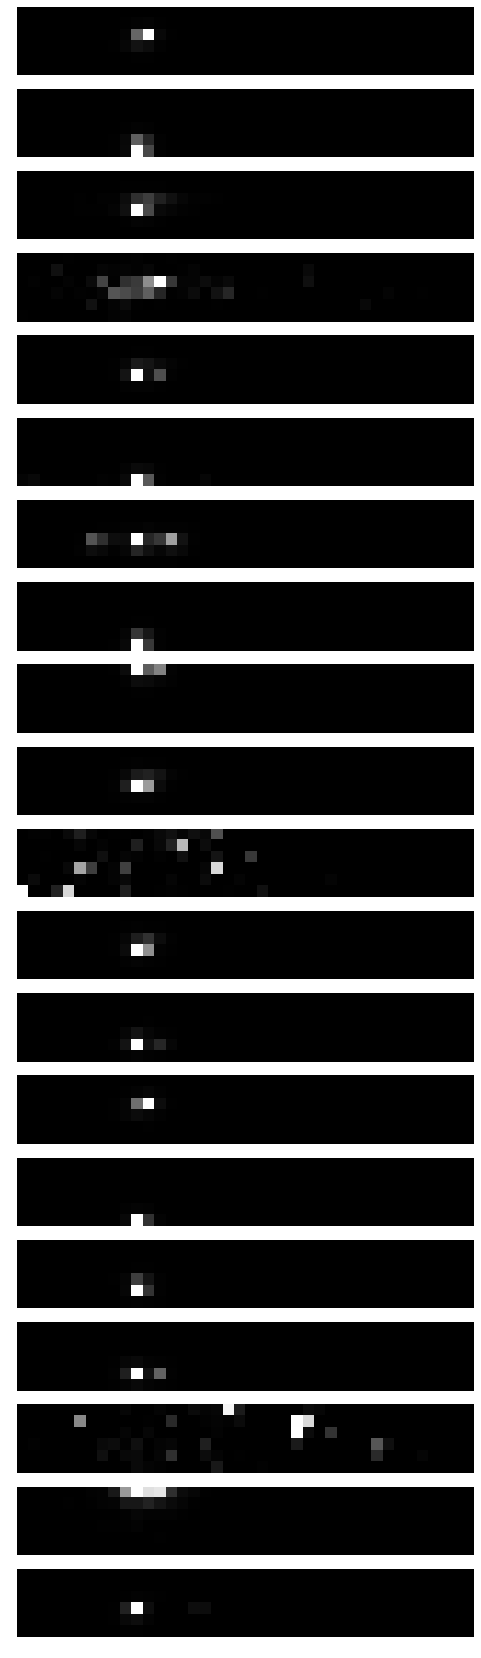

In [5]:
fig, ax = plt.subplots(N, 1, figsize=(60, 30))
for i in range(N):
    ax[i].imshow(images[i], cmap = cm.Greys_r)
    ax[i].axis('off')

## Coordinates of peaks

In [6]:
img = images[-1]

In [7]:
peaks = peak_local_max(img, min_distance=0, num_peaks=2)

In [8]:
peaks

array([[ 3, 10],
       [ 3,  9]])

In [9]:
img[peaks[:,0], peaks[:,1]]

array([33.5705 ,  3.92964])